<img src="https://coursebank.ph/assets/courseware/v1/e74fec5110f1be1d7981e77737e7135b/asset-v1:DAP+SP902+2020_Q3+type@asset+block/SP902_Week1_PGA.png" width="500px"></img>

# Binary Classification of the IMDB Dataset

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
keras.__version__

'2.6.0'

Load IMDB dataset.

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## Vectorize the data

We one-hot-encode our lists to turn them into vectors of zeroes and ones so that we can feed them into our neural network. 

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    '''Create an all-zero matrix of shape (len(sequences), dimension)'''
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [5]:
x_train = vectorize_sequences(train_data) # vectorize training data
x_test = vectorize_sequences(test_data) # vectorize test data
y_train = np.asarray(train_labels).astype('float32') # vectorize training labels
y_test = np.asarray(test_labels).astype('float32') # vectorize test labels

## 32 units

In [6]:
from keras import models
from keras import layers

### Build network

Use layers with `32 hidden units`. Use `tanh` activation instead of `relu`. We still use `sigmoid activation` on the final layer so as to output a probability, i.e. a value between 0 and 1.

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

Use the `mse` loss function instead of `binary_crossentropy`.

In [8]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

### Evaluate

Create validation set by setting apart the first 10,000 samples from the original training data.

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train model for 20 epochs (20 iterations over all samples in the `x_train` and `y_train` tensors) in mini-batches of 512 samples

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 41s 475ms/step - loss: 0.1616 - accuracy: 0.7977 - val_loss: 0.1169 - val_accuracy: 0.8569
Epoch 2/20
30/30 [==============================] - 2s 69ms/step - loss: 0.0822 - accuracy: 0.9114 - val_loss: 0.0946 - val_accuracy: 0.8751
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0562 - accuracy: 0.9364 - val_loss: 0.0825 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0426 - accuracy: 0.9500 - val_loss: 0.0824 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0318 - accuracy: 0.9636 - val_loss: 0.0888 - val_accuracy: 0.8808
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0249 - accuracy: 0.9727 - val_loss: 0.0986 - val_accuracy: 0.8748
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0197 - accuracy: 0.9787 - val_loss: 0.0955 - val_accuracy: 0.8793
Epoch 8/20


### Visualize.

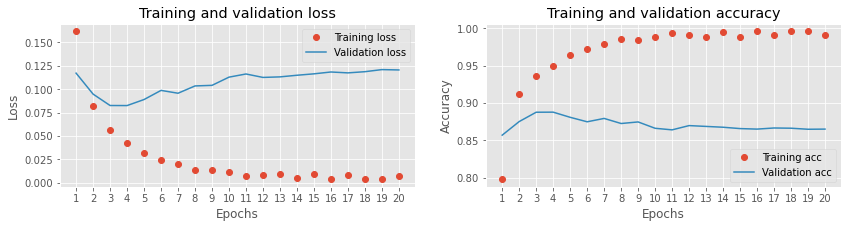

In [11]:
# get accuracy and loss values from history dictionary
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1) # x-axis values

plt.style.use('ggplot') # for styling
fig,ax = plt.subplots(1,2,figsize=(14,3))

# plot loss values per epoch
ax[0].plot(epochs, loss, 'o', label='Training loss')
ax[0].plot(epochs, val_loss, label='Validation loss')
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_xticks(epochs)
ax[0].set_ylabel('Loss')
ax[0].legend()

# plot accuracy values per epoch
ax[1].plot(epochs, acc, 'o', label='Training acc')
ax[1].plot(epochs, val_acc, label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_xticks(epochs)
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

In [12]:
acc[-1]

0.991266667842865

In [13]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 12s 5ms/step - loss: 0.1334 - accuracy: 0.8514


[0.133407860994339, 0.851360023021698]

As expected, training loss decreases and training accuracy increases with every epoch. But note that the validation loss consistently increases after the fourth epoch and the validation accuracy peaks at around the second or third epoch. This could imply overfitting. Furthermore the accuracy of the training set after the 20th epoch is at 99.6% while that of the test set is only 85.1%.

<i>Now, let's see first what happens if we use 64 hidden units instead of 32.</i>

## 64 units

### Build network

In [14]:
# build network
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

### Evaluate

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 51s 1s/step - loss: 0.1575 - accuracy: 0.8005 - val_loss: 0.1071 - val_accuracy: 0.8756
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0799 - accuracy: 0.9089 - val_loss: 0.0912 - val_accuracy: 0.8813
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0558 - accuracy: 0.9330 - val_loss: 0.0856 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0406 - accuracy: 0.9528 - val_loss: 0.0903 - val_accuracy: 0.8768
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0313 - accuracy: 0.9634 - val_loss: 0.0881 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0241 - accuracy: 0.9737 - val_loss: 0.1103 - val_accuracy: 0.8576
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0194 - accuracy: 0.9785 - val_loss: 0.0961 - val_accuracy: 0.8774
Epoch 8/20
30/

### Visualize

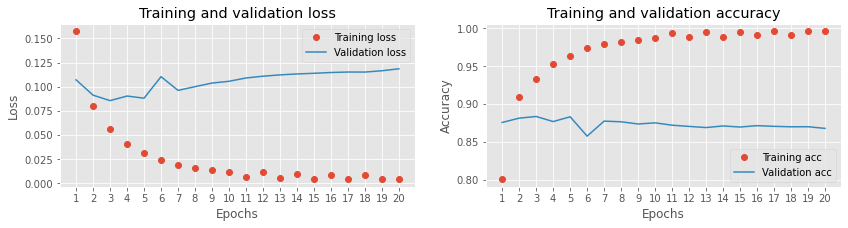

In [16]:
# get accuracy and loss values from history dictionary
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1) # x-axis values

plt.style.use('ggplot') # for styling
fig,ax = plt.subplots(1,2,figsize=(14,3))

# plot loss values per epoch
ax[0].plot(epochs, loss, 'o', label='Training loss')
ax[0].plot(epochs, val_loss, label='Validation loss')
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_xticks(epochs)
ax[0].set_ylabel('Loss')
ax[0].legend()

# plot accuracy values per epoch
ax[1].plot(epochs, acc, 'o', label='Training acc')
ax[1].plot(epochs, val_acc, label='Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_xticks(epochs)
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

In [17]:
acc[-1]

0.996066689491272

In [18]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 7s 3ms/step - loss: 0.1328 - accuracy: 0.8514


[0.13276514410972595, 0.851360023021698]

Increasing the number of hidden units from 32 to 64 units slightly decreased the accuracy of the model. Also, there is still overfitting, i.e. very high accuracy on the training set but relatively lower accuracy on the test set. Note that the validation loss drastically increases and the validation accuracy drastically decreases after the fourth epoch. One way (albeit naive) to address the overfitting issue would be to stop training after the fourth epoch. Other ways to prevent overfitting such as reducing the capacity of the network, adding weight regularization, and adding dropout could be explored.